In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from xgboost import XGBClassifier


from sklearn import metrics




import os

# Model Building

In [4]:
features_df = pd.read_csv("../data/tables/italian_features.csv")
reduced_features_df = pd.read_csv("../data/tables/italian_reduced_features.csv")

In [5]:
# lets build our classification model
# independent variables
X = reduced_features_df
# X=pd.DataFrame(X_stand1)
# the dependent variable
y = features_df['PD']

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [7]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(reduced_features_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(reduced_features_df.index)) * 100))

69.98% data is in training set
30.02% data is in test set


In [8]:
y_train_yPD=y_train[y_train==1].count()
y_train_nPD=y_train[y_train==0].count()
y_test_yPD=y_test[y_test==1].count()
y_test_nPD=y_test[y_test==0].count()

print("In the original dataset people who had parkinson Dieases    : {0} ({1:0.2f}%)".format(len(reduced_features_df.loc[features_df['PD'] == 1]), (len(reduced_features_df.loc[features_df['PD'] == 1])/len(reduced_features_df.index)) * 100))
print("In the original dataset people who didnot have Parkinson Disease   : {0} ({1:0.2f}%)".format(len(reduced_features_df.loc[features_df['PD'] == 0]), (len(reduced_features_df.loc[features_df['PD'] == 0])/len(reduced_features_df.index)) * 100))
print("")
print("In the training dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_train_yPD, (y_train_yPD/len(y_train))*100))
print("In the training dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_train_nPD, (y_train_nPD/len(y_train))*100))
print("")
print("In the test dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_test_yPD, (y_test_yPD/len(y_test))*100))
print("In the test dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_test_nPD, (y_test_nPD/len(y_test))*100))

In the original dataset people who had parkinson Dieases    : 274 (55.58%)
In the original dataset people who didnot have Parkinson Disease   : 219 (44.42%)

In the training dataset people who who had parkinson Dieases    : 199 (57.68%)
In the training dataset people who didnot have Parkinson Disease    : 146 (42.32%)

In the test dataset people who who had parkinson Dieases    : 75 (50.68%)
In the test dataset people who didnot have Parkinson Disease    : 73 (49.32%)


Scales impact

Gradient descent based algorithms like Linear Regression, Logistics Regression
Distance based algorithms like KNN, K-means and SVM
Scales dont impact:

Tree based algorithms like Decision trees

In [9]:
# lets create a copy of the train and test data for scaling


X_Train_stand = X_train.copy()
X_Test_stand = X_test.copy()
# we will use standard scaler for scaling the data.
scale = StandardScaler().fit(X_Train_stand)
X_train= scale.transform(X_Train_stand)
X_test= scale.transform(X_Test_stand)

In [10]:
if (pd.DataFrame(X_train).isnull().sum().any()==0):
    print('There are no null values in the training datset')
else:
    print('There are null values in the training datset')

if (pd.DataFrame(X_test).isnull().sum().any()==0):
    print('There are no null values in the test datset')
else:
    print('There are null values in the test datset')

There are no null values in the training datset
There are no null values in the test datset


# Logistic Regression

In [11]:
# Fit the model on train data
model = LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [12]:
# predict on the test data
y_predict_LR = model.predict(X_test)
y_predict_LR

array([0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.])

In [13]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
coef_df

,0,1,2,3,4,intercept
0,-0.238896,0.108719,1.713917,-0.052681,-2.146375,0.381692


In [14]:
model_score_LR = model.score(X_test, y_test)
print("Model Accuracy of Logistic Regression is: {0:.4f}".format(model_score_LR))
print()

Model Accuracy of Logistic Regression is: 0.8716



Confusion Matrix - Logistic Regression


<Axes: >

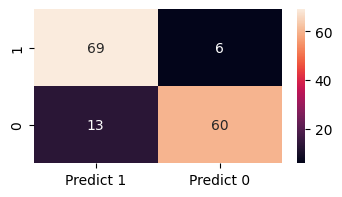

In [15]:
print("Confusion Matrix - Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_predict_LR, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)

In [16]:
print("Classification Report - Logistic Regression")
print(metrics.classification_report(y_test, y_predict_LR, labels=[1, 0]))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           1       0.84      0.92      0.88        75
           0       0.91      0.82      0.86        73

    accuracy                           0.87       148
   macro avg       0.88      0.87      0.87       148
weighted avg       0.87      0.87      0.87       148



# Logistic Regression with Hyperparameter tuning

Best Score: 0.7979271708683473
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}
86.48648648648648
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86        73
         1.0       0.83      0.92      0.87        75

    accuracy                           0.86       148
   macro avg       0.87      0.86      0.86       148
weighted avg       0.87      0.86      0.86       148

0.8641095890410959
[0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0

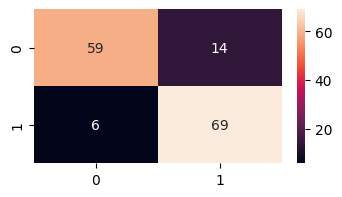

In [17]:
########Hyperparameter tuning for SVM####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

#Convert to dictionary
hyperparameters = dict(solver=solvers,penalty=penalty,C=c_values)
#Create new LR object
model_lr2 = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(model_lr2, hyperparameters, cv=cv)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100

plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_knn_2, annot=True)

print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

# KNN with hyperparameter tuning

Best leaf_size: 1
Best p: 1
Best n_neighbors: 16
Best Score: 0.8001680672268907
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 16, 'p': 1}
{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'p': [1, 2]}
82.43243243243244
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82        73
         1.0       0.81      0.85      0.83        75

    accuracy                           0.82       148
   macro avg       0.83      0.82      0.82       148
weighted avg       0.83      0.82      0.82       148

0.8239269406392695
[0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0

<Axes: >

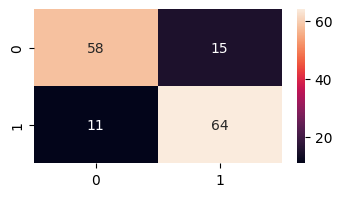

In [19]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,20)) #neighbours must be < number of samples (22)
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_knn_2, annot=True)

# Naive Bayes

### No important parameters to tune

In [20]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [21]:
y_predict_NB = NB_model.predict(X_test)
model_score_NB=metrics.accuracy_score(y_test, y_predict_NB)

print("Model Accuracy of Naive Bayes is: {0:.4f}".format(model_score_NB))
print()

Model Accuracy of Naive Bayes is: 0.8108



Confusion Matrix - Naive Bayes


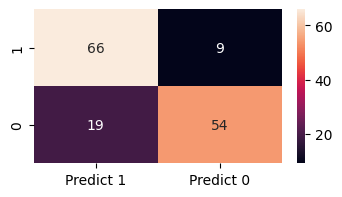

In [22]:
print("Confusion Matrix - Naive Bayes")
cm=metrics.confusion_matrix(y_test, y_predict_NB, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True);

In [23]:
print("Classification Report - Naive Bayes")
print(metrics.classification_report(y_test, y_predict_NB, labels=[1, 0]))

Classification Report - Naive Bayes
              precision    recall  f1-score   support

           1       0.78      0.88      0.82        75
           0       0.86      0.74      0.79        73

    accuracy                           0.81       148
   macro avg       0.82      0.81      0.81       148
weighted avg       0.82      0.81      0.81       148



# SVM

In [24]:
clf = svm.SVC(gamma=0.025, C=3) 

In [25]:
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [26]:
y_predict_SVM = clf.predict(X_test)

In [27]:
model_score_NB=metrics.accuracy_score(y_test, y_predict_SVM)

print("Model Accuracy of SVM is: {0:.4f}".format(model_score_NB))
print()

Model Accuracy of SVM is: 0.8784



Confusion Matrix - SVM


<Axes: >

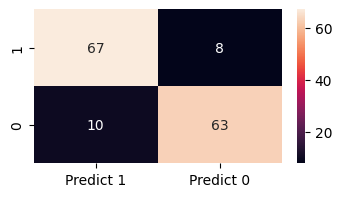

In [28]:
print("Confusion Matrix - SVM")
cm=metrics.confusion_matrix(y_test, y_predict_SVM, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)

In [29]:
print("Classification Report - SVM")
print(metrics.classification_report(y_test, y_predict_SVM, labels=[1, 0]))

Classification Report - SVM
              precision    recall  f1-score   support

           1       0.87      0.89      0.88        75
           0       0.89      0.86      0.88        73

    accuracy                           0.88       148
   macro avg       0.88      0.88      0.88       148
weighted avg       0.88      0.88      0.88       148



# SVM with hyperparameter tuning

Best Score: 0.8318840579710145
Best Hyperparameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
86.48648648648648
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        73
         1.0       0.86      0.88      0.87        75

    accuracy                           0.86       148
   macro avg       0.87      0.86      0.86       148
weighted avg       0.87      0.86      0.86       148

0.8646575342465753
[0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1

<Axes: >

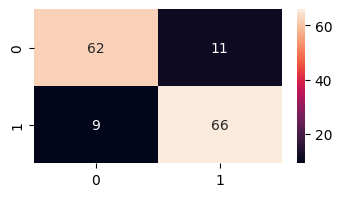

In [30]:
########Hyperparameter tuning for SVM####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['rbf']

#Convert to dictionary
hyperparameters = dict(C=C, gamma=gamma, kernel=kernel)
#Create new KNN object
svm2 = svm.SVC()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(svm2, hyperparameters, refit=True)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_knn_2, annot=True)

In [31]:
model_svm = svm.SVC(C = 1000, gamma=0.01,kernel='rbf')
model_svm = model_svm.fit(X_train, y_train)

y_pred_svm_2 = best_model.predict(X_test)

conf_matrix_svm_2 = confusion_matrix(y_test, y_pred_svm_2)

accuracy_svm_2 = ((conf_matrix_svm_2[0,0] + conf_matrix_svm_2[1,1])/(conf_matrix_svm_2[0,0] +conf_matrix_svm_2[0,1]+conf_matrix_svm_2[1,0]+conf_matrix_svm_2[1,1]))*100

print(conf_matrix_svm_2)
print(accuracy_svm_2)

[[62 11]
 [ 9 66]]
86.48648648648648


# Random Forest

In [32]:
model_rf = RandomForestClassifier(n_estimators = 50,random_state=1,max_features=3) 
model_rf = model_rf.fit(X_train, y_train)

In [33]:
y_predict_rf = model_rf.predict(X_test)
print(model_rf.score(X_test, y_test))

0.8243243243243243


Confusion Matrix -Random Forest


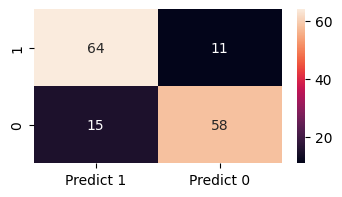

In [34]:
print("Confusion Matrix -Random Forest")
cm=metrics.confusion_matrix(y_test, y_predict_rf, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True);

In [35]:
print("Classification Report - Random Forest")
print(metrics.classification_report(y_test, y_predict_rf, labels=[1, 0]))

Classification Report - Random Forest
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        75
           0       0.84      0.79      0.82        73

    accuracy                           0.82       148
   macro avg       0.83      0.82      0.82       148
weighted avg       0.83      0.82      0.82       148



# Random Forest with Hyperparameter Tuning

# Bagging

In [36]:
bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [37]:
y_predict_bag = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))

0.8243243243243243


Confusion Matrix -Bagging Classifier


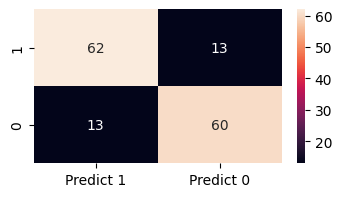

In [38]:
print("Confusion Matrix -Bagging Classifier")
cm=metrics.confusion_matrix(y_test, y_predict_bag, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True);

In [39]:
print("Classification Report - Bagging Classifier")
print(metrics.classification_report(y_test, y_predict_bag, labels=[1, 0]))

Classification Report - Bagging Classifier
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        75
           0       0.82      0.82      0.82        73

    accuracy                           0.82       148
   macro avg       0.82      0.82      0.82       148
weighted avg       0.82      0.82      0.82       148



# Bagging with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 10}
Best Model Accuracy: 0.8108108108108109
Confusion Matrix - Bagging Classifier
Classification Report - Bagging Classifier
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        75
           0       0.81      0.81      0.81        73

    accuracy                           0.81       148
   macro avg       0.81      0.81      0.81       148
weighted avg       0.81      0.81      0.81       148



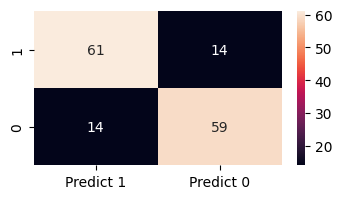

In [48]:
#TESTE
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# Define the Bagging Classifier with hyperparameters to be tuned
bgcl = BaggingClassifier(random_state=1)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],  # Adjust the number of estimators
    # You can add more hyperparameters to tune here
}

# Define the scoring method, e.g., accuracy
scoring = make_scorer(accuracy_score)

# Create the Grid Search object
grid_search = GridSearchCV(bgcl, param_grid, scoring=scoring, cv=5)

# Fit the Grid Search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best Bagging Classifier model
best_bgcl = grid_search.best_estimator_

# Fit the best model on the training data
best_bgcl.fit(X_train, y_train)

# Make predictions on the test set
y_predict_bag = best_bgcl.predict(X_test)

# Print the accuracy of the best model on the test set
accuracy = best_bgcl.score(X_test, y_test)
print("Best Model Accuracy:", accuracy)

# Compute and print the confusion matrix
print("Confusion Matrix - Bagging Classifier")
cm = confusion_matrix(y_test, y_predict_bag, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(4, 2))
sns.heatmap(df_cm, annot=True)

# Print the classification report
print("Classification Report - Bagging Classifier")
print(classification_report(y_test, y_predict_bag, labels=[1, 0]))


# AdaBoost

In [40]:
AdaBC = AdaBoostClassifier(n_estimators=50, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
AdaBC = AdaBC.fit(X_train, y_train)

In [41]:
y_predict_ada = AdaBC.predict(X_test)
print(AdaBC.score(X_test , y_test))

0.777027027027027


Confusion Matrix -Ada Boost


<Axes: >

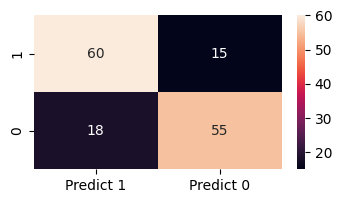

In [42]:
print("Confusion Matrix -Ada Boost")
cm=metrics.confusion_matrix(y_test, y_predict_ada, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)

In [43]:
print("Classification Report - Ada Boost")
print(metrics.classification_report(y_test, y_predict_ada, labels=[1, 0]))

Classification Report - Ada Boost
              precision    recall  f1-score   support

           1       0.77      0.80      0.78        75
           0       0.79      0.75      0.77        73

    accuracy                           0.78       148
   macro avg       0.78      0.78      0.78       148
weighted avg       0.78      0.78      0.78       148



# AdaBoost with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 10}
Best Model Accuracy: 0.7905405405405406
Confusion Matrix - Ada Boost
Classification Report - Ada Boost
              precision    recall  f1-score   support

           1       0.78      0.81      0.80        75
           0       0.80      0.77      0.78        73

    accuracy                           0.79       148
   macro avg       0.79      0.79      0.79       148
weighted avg       0.79      0.79      0.79       148



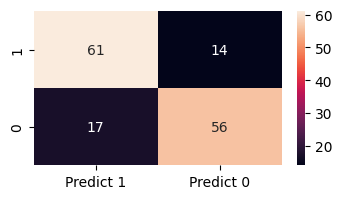

In [49]:
#TESTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

# Define the AdaBoost Classifier with hyperparameters to be tuned
AdaBC = AdaBoostClassifier(random_state=1)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],  # Adjust the number of estimators
    # You can add more hyperparameters to tune here
}

# Define the scoring method, e.g., accuracy
scoring = make_scorer(accuracy_score)

# Create the Grid Search object
grid_search = GridSearchCV(AdaBC, param_grid, scoring=scoring, cv=5)

# Fit the Grid Search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best AdaBoost Classifier model
best_AdaBC = grid_search.best_estimator_

# Fit the best model on the training data
best_AdaBC.fit(X_train, y_train)

# Make predictions on the test set
y_predict_ada = best_AdaBC.predict(X_test)

# Print the accuracy of the best model on the test set
accuracy = best_AdaBC.score(X_test, y_test)
print("Best Model Accuracy:", accuracy)

# Compute and print the confusion matrix
print("Confusion Matrix - Ada Boost")
cm = confusion_matrix(y_test, y_predict_ada, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(4, 2))
sns.heatmap(df_cm, annot=True)

# Print the classification report
print("Classification Report - Ada Boost")
print(classification_report(y_test, y_predict_ada, labels=[1, 0]))


# XG Boost

In [44]:
model = XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=4)
model = model.fit(X_train, y_train)
y_predict_XGB = model.predict(X_test)
print('The accuracy of the XGB Classifier is: [%.8f]' % accuracy_score(y_test, y_predict_XGB))

/Users/tomas/Documents/Tese/Predictive-models-Parkinson/src/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


The accuracy of the XGB Classifier is: [0.79729730]


Confusion Matrix - XGB Classifier


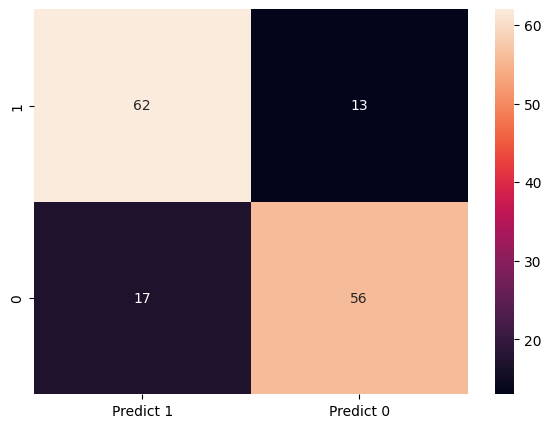

In [45]:
print("Confusion Matrix - XGB Classifier")
cm=metrics.confusion_matrix(y_test, y_predict_XGB, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [46]:
print("Classification Report - XGB Classifier")
print(metrics.classification_report(y_test, y_predict_XGB, labels=[1, 0]))

Classification Report - XGB Classifier
              precision    recall  f1-score   support

           1       0.78      0.83      0.81        75
           0       0.81      0.77      0.79        73

    accuracy                           0.80       148
   macro avg       0.80      0.80      0.80       148
weighted avg       0.80      0.80      0.80       148



# XGBoost with Hyperparameter tuning

/Users/tomas/Documents/Tese/Predictive-models-Parkinson/src/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/src/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/src/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/src/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. C

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
The accuracy of the XGB Classifier is: [0.77702703]
Confusion Matrix - XGB Classifier
Classification Report - XGB Classifier
              precision    recall  f1-score   support

           1       0.76      0.83      0.79        75
           0       0.80      0.73      0.76        73

    accuracy                           0.78       148
   macro avg       0.78      0.78      0.78       148
weighted avg       0.78      0.78      0.78       148



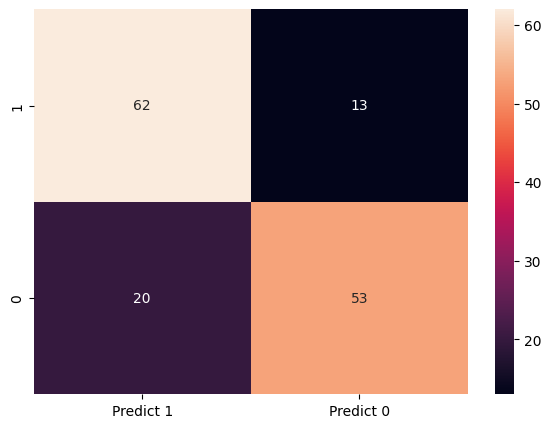

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report
import warnings

# Define the XGBClassifier with hyperparameters to be tuned
model = XGBClassifier(random_state=0)

# Define the hyperparameters grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Adjust the learning rate
    'n_estimators': [50, 100, 200],  # Adjust the number of estimators
    'max_depth': [3, 4, 5]  # Adjust the maximum depth of trees
    # You can add more hyperparameters to tune here
}

# Define the scoring method, e.g., accuracy
scoring = make_scorer(accuracy_score)

# Create the Grid Search object
grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5)

# Fit the Grid Search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best XGBClassifier model
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)


# Make predictions on the test set
y_predict_XGB = best_model.predict(X_test)

# Print the accuracy of the best model on the test set
accuracy = accuracy_score(y_test, y_predict_XGB)
print('The accuracy of the XGB Classifier is: [%.8f]' % accuracy)

# Compute and print the confusion matrix
print("Confusion Matrix - XGB Classifier")
cm = confusion_matrix(y_test, y_predict_XGB, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True)

# Print the classification report
print("Classification Report - XGB Classifier")
print(classification_report(y_test, y_predict_XGB, labels=[1, 0]))
